# Customer Segmentation Tool

## Project Overview

This project is part of the **CodeClause Internship (Golden Level)**. The goal is to develop a **Customer Segmentation Tool** using clustering algorithms. The project also includes designing a **UI for data input**, applying **machine learning (K-Means)** to segment customers based on their behavior, and evaluating the results.

## 📚 Table of Contents
1. [Introduction](#introduction)
2. [Importing Libraries](#importing-libraries)
3. [Loading Dataset](#loading-dataset)
4. [Exploratory Data Analysis](#exploratory-data-analysis)
5. [Data Cleaning](#data-cleaning)
6. [Feature Engineering](#feature-engineering)
7. [Train-Test Split](#train-test-split)
8. [Modeling with K-Means](#modeling-with-k-means)
9. [Evaluation and Insights](#evaluation-and-insights)
10. [Model Saving](#model-saving)
11. [Conclusion](#conclusion)

## 1. Introduction
Customer segmentation is a process of dividing customers into groups based on common characteristics. In this project, we’ll use clustering (specifically K-Means) to group similar customers together for better targeting and marketing.

## 2. Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [35]:
# ## 3. Loading Dataset
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [37]:
# ## 4. Exploratory Data Analysis
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


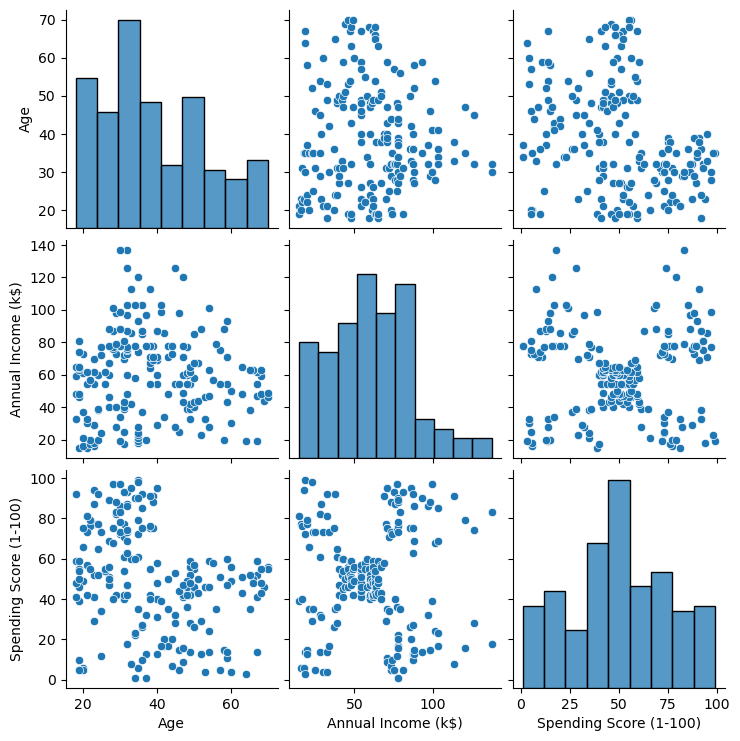

In [9]:
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

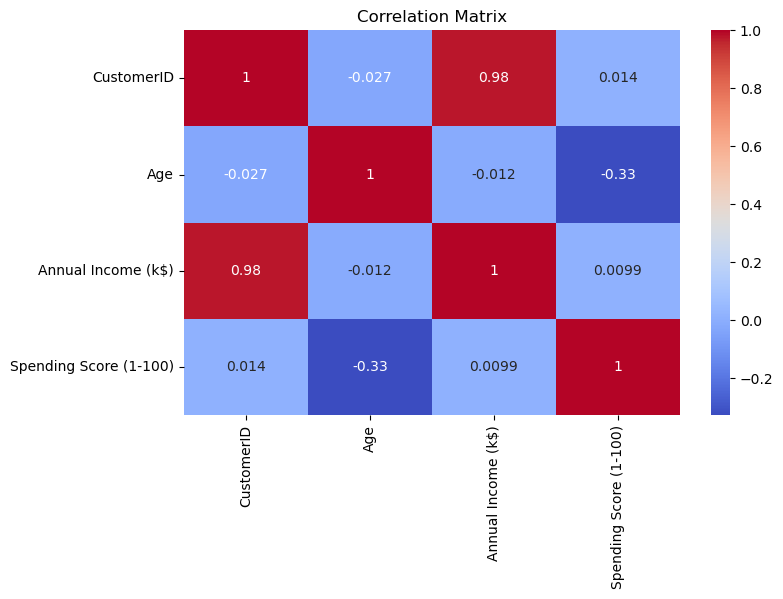

In [39]:
plt.figure(figsize=(8,5))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [41]:
# ## 5. Data Cleaning
df.isnull().sum()  # Check for missing values

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [43]:
# Drop CustomerID for modeling
df_model = df.drop('CustomerID', axis=1)

In [45]:
df_model.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [47]:
# ## 6. Feature Engineering
# Encode Gender
df_model['Genre'] = df_model['Genre'].map({'Male': 0, 'Female': 1})

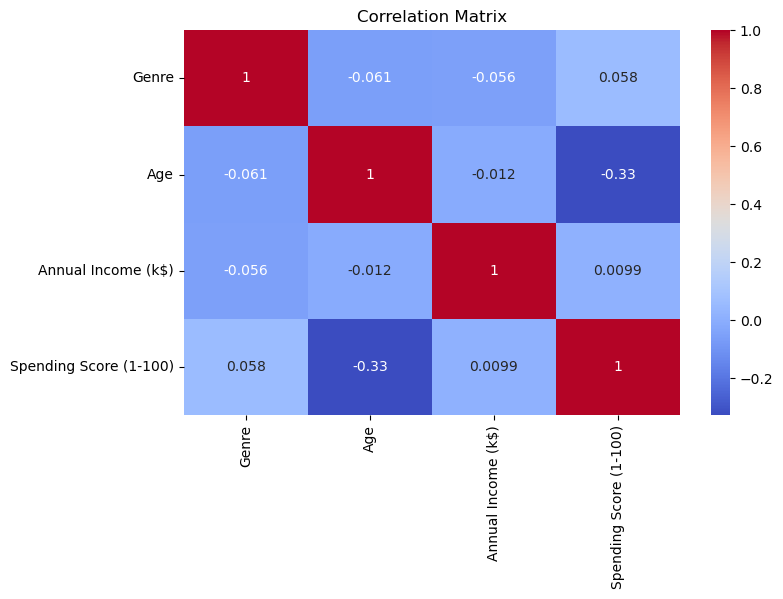

In [51]:
plt.figure(figsize=(8,5))
sns.heatmap(df_model.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [53]:
# Scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_model)

In [55]:
# ## 7. Train-Test Split (Not typical for clustering but useful for visualization/eval)
# In clustering, we use all data for unsupervised learning
kmeans = KMeans(n_clusters=2)

In [ ]:
# ## 8. 🧩 Modeling with K-Means
inertia = []
silhouette = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(df_scaled, kmeans.labels_))

In [ ]:
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [ ]:
plt.plot(k_range, silhouette, marker='s')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [ ]:
# Final KMeans Model
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df_scaled)
df['Cluster'] = kmeans.labels_

In [ ]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='tab10')
plt.title('Customer Segments')
plt.show()

In [ ]:
# ## 9. 🧾 Evaluation and Insights
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
pd.DataFrame(cluster_centers, columns=df_model.columns)

In [ ]:
# ## 10. 💾 Model Saving
import joblib
joblib.dump(kmeans, 'kmeans_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

In [ ]:
# ## 11. ✅ Conclusion
print("Successfully built a customer segmentation model using KMeans. Saved model and scaler.")